# Pandas

The `numpy` module is excellent for numerical computations, but to handle missing data or arrays with mixed types takes more work. The `pandas` module is currently the most widely used tool for data manipulation, providing high-performance, easy-to-use data structures and advanced data analysis tools.

In particular `pandas` features:

* A fast and efficient "DataFrame" object for data manipulation with integrated indexing;
* Tools for reading and writing data between in-memory data structures and different formats (CSV, Excel, SQL, HDF5);
* Intelligent data alignment and integrated handling of missing data;
* Intelligent label-based slicing, fancy indexing, and subsetting of large data sets;
* Aggregating or transforming data with a powerful "group-by" engine; 
* High performance merging and joining of data sets;
* Hierarchical axis indexing provides an intuitive way of working with high-dimensional data in a lower-dimensional data structure;
* Time series-functionalities;
* Highly optimized for performance, with critical code paths written in Cython or C.


In [2]:
import pandas as pd
import numpy as np

## Series

Series are completely equivalent to 1D array but with axis labels and the possibility to store heterogeneous elements. Of paramount importance are the time-series, used to define time evolutions of a phenomenon. 


In [3]:
from string import ascii_lowercase as letters

# Creating a series, accessing indexes, values and values by their index 
xs = pd.Series(np.arange(10)*0.5, index=tuple(letters[:10]))
print ("xs:", xs,'\n')
print ("xs indexes:",xs.index,'\n')
# Values of the Series are actually a numpy array
print ("xs values:", xs.values, type(xs.values),'\n')
print (xs['f'], xs.f, xs.h, '\n')
print (xs[['d', 'f', 'h']], '\n')
print (type(xs[['d', 'f', 'h']]), '\n')

xs: a    0.0
b    0.5
c    1.0
d    1.5
e    2.0
f    2.5
g    3.0
h    3.5
i    4.0
j    4.5
dtype: float64 

xs indexes: Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'], dtype='object') 

xs values: [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5] <class 'numpy.ndarray'> 

2.5 2.5 3.5 

d    1.5
f    2.5
h    3.5
dtype: float64 

<class 'pandas.core.series.Series'> 



In [3]:
# Extracting elements and operations: same as numpy array
print (xs[:3],'\n')
print (xs[7:], '\n')
print (xs[::3], '\n')
print (xs[xs>3], '\n')
print (np.exp(xs), '\n')
print (np.mean(xs), np.std(xs), '\n')

a    0.0
b    0.5
c    1.0
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a    0.0
d    1.5
g    3.0
j    4.5
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a     1.000000
b     1.648721
c     2.718282
d     4.481689
e     7.389056
f    12.182494
g    20.085537
h    33.115452
i    54.598150
j    90.017131
dtype: float64 

2.25 1.4361406616345072 



In [4]:
# Series can be created from python dictionary too.
# Not that the elements can be whatever!
d = {'b' : 1, 'a' : 'cat', 'c' : [2,3]}
pd.Series(d)



b         1
a       cat
c    [2, 3]
dtype: object

A key difference between Series and ndarray is that operations between Series automatically align the data based on label. Thus, you can write computations without considering whether the Series involved have the same labels.

In [5]:
s = pd.Series(np.random.randn(5), index=tuple(letters[:5]))
print(s)
s = s[1:] + s[:-1]
print(s)

a   -0.737403
b    0.935854
c    0.952677
d   -1.664661
e    1.786946
dtype: float64
a         NaN
b    1.871708
c    1.905354
d   -3.329321
e         NaN
dtype: float64


### Time series

Time series are very often used to profile the behaviour of a quantity as a function of time. Pandas has a special index for that, `DatetimeIndex`, that can be created e.g. with the function `pd.data_range()`

In [6]:
# to define a date, the datetime module is very useful
import datetime as dt
date = dt.date.today()
print(date)

date = dt.datetime(2024,11,27,10,45,10,15)
print (date)

# otherwise, several notations are interpreted too
date = 'Nov 27 2024'
# or alternatively
date = '27/11/2024 10:45:00'
print (date)

days = pd.date_range(date, periods=7, freq='D')
print (days)

seconds = pd.date_range(date, periods=3600, freq='s')
print (seconds)


2024-11-27
2024-11-27 10:45:10.000015
27/11/2024 10:45:00
DatetimeIndex(['2024-11-27 10:45:00', '2024-11-28 10:45:00',
               '2024-11-29 10:45:00', '2024-11-30 10:45:00',
               '2024-12-01 10:45:00', '2024-12-02 10:45:00',
               '2024-12-03 10:45:00'],
              dtype='datetime64[ns]', freq='D')
DatetimeIndex(['2024-11-27 10:45:00', '2024-11-27 10:45:01',
               '2024-11-27 10:45:02', '2024-11-27 10:45:03',
               '2024-11-27 10:45:04', '2024-11-27 10:45:05',
               '2024-11-27 10:45:06', '2024-11-27 10:45:07',
               '2024-11-27 10:45:08', '2024-11-27 10:45:09',
               ...
               '2024-11-27 11:44:50', '2024-11-27 11:44:51',
               '2024-11-27 11:44:52', '2024-11-27 11:44:53',
               '2024-11-27 11:44:54', '2024-11-27 11:44:55',
               '2024-11-27 11:44:56', '2024-11-27 11:44:57',
               '2024-11-27 11:44:58', '2024-11-27 11:44:59'],
              dtype='datetime64[ns]', leng

To learn more about the frequency strings, please see this [link](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases)


Timestamped data is the most basic type of time series data that associates values with points in time. For pandas objects it means using the points in time.

functions like `pd.to_datetime` can be used, for instance, when reading information as string from a dataset.

Timestamp is the pandas equivalent of python’s Datetime and is interchangeable with it in most cases. 

In [7]:
tstamp = pd.Timestamp(dt.datetime(2020, 11, 9))

# internally it counts the nanoseconds from January 1st 19
#tstamp = pd.Timestamp(dt.datetime(1970, 1, 1, 0, 0, 0, 1))
print(tstamp.value)

# when creating a timestamp the format can be explicitly passed
ts = pd.to_datetime('2010/11/12', format='%Y/%m/%d')
print (type(ts))
print (ts.value)
ts = pd.to_datetime('12-11-2010 00:00', format='%d-%m-%Y %H:%M')
print (ts)
print (ts.value)



1604880000000000000
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1289520000000000000
2010-11-12 00:00:00
1289520000000000000


A standard series can be created and (range of) elements can be used as indexes

In [8]:
tseries = pd.Series(np.random.normal(10, 1, len(days)), index=days) 
#random.normal generates random values with normal distribution (gauss)
#10 is the mean of distribution / 1 standard deviation/len(days) is the n* of generated values (one for each day in days)
# Extracting elements
print (tseries[0:4], '\n')
print (tseries['2024-11-27':'2024-12-03'], '\n') # Note - includes end time


2024-11-27 10:45:00    10.656582
2024-11-28 10:45:00    10.050866
2024-11-29 10:45:00     9.771438
2024-11-30 10:45:00    11.349905
Freq: D, dtype: float64 

2024-11-27 10:45:00    10.656582
2024-11-28 10:45:00    10.050866
2024-11-29 10:45:00     9.771438
2024-11-30 10:45:00    11.349905
2024-12-01 10:45:00     8.532466
2024-12-02 10:45:00    10.114230
2024-12-03 10:45:00    10.500668
Freq: D, dtype: float64 



`pd.to_datetime` can also be used to create a `DatetimeIndex`:

In [9]:
pd.to_datetime([1, 2, 3, 4], unit='D', origin=pd.Timestamp('1980-02-03'))

DatetimeIndex(['1980-02-04', '1980-02-05', '1980-02-06', '1980-02-07'], dtype='datetime64[ns]', freq=None)

## DataFrame

A pandas DataFrame is like a simple tabular spreadsheet. For future reference (or for people already familiar with R), a pandas DataFrame is very similar to the R DataFrame.

Each column in a DataFrame is a Series object.

The element can be whatever, missing data are dealt with too (as NaN)

### DataFrame creation

A DataFrame can be created implicitly, with, e.g., a DatatimeIndex object as index:

In [10]:
entries=10
dates=pd.date_range('11/27/2024 10:45:00',freq='h', periods=entries)
df = pd.DataFrame(np.random.randn(entries,4), index=dates, columns=['A','B','C','D'])
df
#freq h is the hour frequency by 1 hour. other possibles frequencies: min,s,D(days),W (weeks),M meses, Y anos

,A,B,C,D
2024-11-27 10:45:00,0.827156,-1.604983,-1.110177,0.592525
2024-11-27 11:45:00,-0.883288,0.497948,0.344002,1.499843
2024-11-27 12:45:00,-1.948271,-0.499199,-0.603480,-1.303241
2024-11-27 13:45:00,1.016287,0.763845,0.821832,-0.628002
2024-11-27 14:45:00,-1.638349,-0.006703,2.040568,-0.133891
2024-11-27 15:45:00,0.086718,1.035368,-2.423050,0.684830
2024-11-27 16:45:00,-2.043401,0.425657,0.530488,2.185599
2024-11-27 17:45:00,0.832827,0.059554,-0.100709,0.419816
2024-11-27 18:45:00,-1.222739,0.127480,-0.367203,-1.881485
2024-11-27 19:45:00,-1.023242,-1.209758,0.874479,0.150607


or by means of a dictionary:


In [11]:
df2 = pd.DataFrame(
    { 'A' : 1.,
      'B' : pd.Timestamp('20130102'),
      'C' : pd.Series(1,index=range(4),dtype='float32'),
      'D' : np.arange(7,11),
      'E' : pd.Categorical(["test","train","test","train"]),
    }
    )
df2

# check what happens if D and E had different lenghts 
#ans:If D and E had different lengths, Pandas would raise a ValueError when trying to create the DataFrame.

,A,B,C,D,E
0,1.0,2013-01-02,1.0,7,test
1,1.0,2013-01-02,1.0,8,train
2,1.0,2013-01-02,1.0,9,test
3,1.0,2013-01-02,1.0,10,train


### Viewing Data

In [12]:
df.head(2) #shows the (n) rows

,A,B,C,D
2024-11-27 10:45:00,0.827156,-1.604983,-1.110177,0.592525
2024-11-27 11:45:00,-0.883288,0.497948,0.344002,1.499843


In [13]:
df.tail(4) #shows lasts rows.

,A,B,C,D
2024-11-27 16:45:00,-2.043401,0.425657,0.530488,2.185599
2024-11-27 17:45:00,0.832827,0.059554,-0.100709,0.419816
2024-11-27 18:45:00,-1.222739,0.127480,-0.367203,-1.881485
2024-11-27 19:45:00,-1.023242,-1.209758,0.874479,0.150607


In [14]:
df.index #index of the rows

DatetimeIndex(['2024-11-27 10:45:00', '2024-11-27 11:45:00',
               '2024-11-27 12:45:00', '2024-11-27 13:45:00',
               '2024-11-27 14:45:00', '2024-11-27 15:45:00',
               '2024-11-27 16:45:00', '2024-11-27 17:45:00',
               '2024-11-27 18:45:00', '2024-11-27 19:45:00'],
              dtype='datetime64[ns]', freq='h')

In [15]:
df.columns #name of columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [16]:
df.values #dataframe as array

array([[ 0.82715616, -1.60498308, -1.11017663,  0.59252519],
       [-0.88328834,  0.49794833,  0.3440015 ,  1.49984257],
       [-1.94827097, -0.49919871, -0.6034804 , -1.3032407 ],
       [ 1.01628698,  0.7638454 ,  0.82183163, -0.62800199],
       [-1.63834941, -0.00670299,  2.04056812, -0.13389129],
       [ 0.08671831,  1.03536828, -2.42304974,  0.68483049],
       [-2.04340116,  0.42565692,  0.53048839,  2.18559943],
       [ 0.83282736,  0.05955384, -0.10070888,  0.4198164 ],
       [-1.22273895,  0.12747959, -0.36720325, -1.88148512],
       [-1.02324225, -1.209758  ,  0.87447883,  0.15060705]])

In [17]:
df.describe() #shows statistic properties

,A,B,C,D
count,10.000000,10.000000,10.000000,10.000000
mean,-0.599630,-0.041079,0.000675,0.158660
std,1.192585,0.841707,1.230024,1.222220
min,-2.043401,-1.604983,-2.423050,-1.881485
25%,-1.534447,-0.376075,-0.544411,-0.504474
50%,-0.953265,0.093517,0.121646,0.285212
75%,0.642047,0.479875,0.748996,0.661754
max,1.016287,1.035368,2.040568,2.185599


In [18]:
df.T #traspose rows and columns

,2024-11-27 10:45:00,2024-11-27 11:45:00,2024-11-27 12:45:00,2024-11-27 13:45:00,2024-11-27 14:45:00,2024-11-27 15:45:00,2024-11-27 16:45:00,2024-11-27 17:45:00,2024-11-27 18:45:00,2024-11-27 19:45:00
A,0.827156,-0.883288,-1.948271,1.016287,-1.638349,0.086718,-2.043401,0.832827,-1.222739,-1.023242
B,-1.604983,0.497948,-0.499199,0.763845,-0.006703,1.035368,0.425657,0.059554,0.127480,-1.209758
C,-1.110177,0.344002,-0.603480,0.821832,2.040568,-2.423050,0.530488,-0.100709,-0.367203,0.874479
D,0.592525,1.499843,-1.303241,-0.628002,-0.133891,0.684830,2.185599,0.419816,-1.881485,0.150607


In [19]:
df.sort_index(axis=0,ascending=True) 

,A,B,C,D
2024-11-27 10:45:00,0.827156,-1.604983,-1.110177,0.592525
2024-11-27 11:45:00,-0.883288,0.497948,0.344002,1.499843
2024-11-27 12:45:00,-1.948271,-0.499199,-0.603480,-1.303241
2024-11-27 13:45:00,1.016287,0.763845,0.821832,-0.628002
2024-11-27 14:45:00,-1.638349,-0.006703,2.040568,-0.133891
2024-11-27 15:45:00,0.086718,1.035368,-2.423050,0.684830
2024-11-27 16:45:00,-2.043401,0.425657,0.530488,2.185599
2024-11-27 17:45:00,0.832827,0.059554,-0.100709,0.419816
2024-11-27 18:45:00,-1.222739,0.127480,-0.367203,-1.881485
2024-11-27 19:45:00,-1.023242,-1.209758,0.874479,0.150607


In [20]:
df.sort_values(by="C") #order data

,A,B,C,D
2024-11-27 15:45:00,0.086718,1.035368,-2.423050,0.684830
2024-11-27 10:45:00,0.827156,-1.604983,-1.110177,0.592525
2024-11-27 12:45:00,-1.948271,-0.499199,-0.603480,-1.303241
2024-11-27 18:45:00,-1.222739,0.127480,-0.367203,-1.881485
2024-11-27 17:45:00,0.832827,0.059554,-0.100709,0.419816
2024-11-27 11:45:00,-0.883288,0.497948,0.344002,1.499843
2024-11-27 16:45:00,-2.043401,0.425657,0.530488,2.185599
2024-11-27 13:45:00,1.016287,0.763845,0.821832,-0.628002
2024-11-27 19:45:00,-1.023242,-1.209758,0.874479,0.150607
2024-11-27 14:45:00,-1.638349,-0.006703,2.040568,-0.133891


## Selection

### Getting slices

The following show how to get part of the DataFrame (i.e. not just the elements)

In [21]:
## standard and safe
print (df['A'],'\n')

## equivalent but dangerous (imagine blank spaces in the name of the column..)
print (df.A)

2024-11-27 10:45:00    0.827156
2024-11-27 11:45:00   -0.883288
2024-11-27 12:45:00   -1.948271
2024-11-27 13:45:00    1.016287
2024-11-27 14:45:00   -1.638349
2024-11-27 15:45:00    0.086718
2024-11-27 16:45:00   -2.043401
2024-11-27 17:45:00    0.832827
2024-11-27 18:45:00   -1.222739
2024-11-27 19:45:00   -1.023242
Freq: h, Name: A, dtype: float64 

2024-11-27 10:45:00    0.827156
2024-11-27 11:45:00   -0.883288
2024-11-27 12:45:00   -1.948271
2024-11-27 13:45:00    1.016287
2024-11-27 14:45:00   -1.638349
2024-11-27 15:45:00    0.086718
2024-11-27 16:45:00   -2.043401
2024-11-27 17:45:00    0.832827
2024-11-27 18:45:00   -1.222739
2024-11-27 19:45:00   -1.023242
Freq: h, Name: A, dtype: float64


In [22]:
# selecting rows by counting
print (df[0:3])

# or by index
print (df["2024-11-27 10:45:00":"2024-11-27 12:45:00"])

                            A         B         C         D
2024-11-27 10:45:00  0.827156 -1.604983 -1.110177  0.592525
2024-11-27 11:45:00 -0.883288  0.497948  0.344002  1.499843
2024-11-27 12:45:00 -1.948271 -0.499199 -0.603480 -1.303241
                            A         B         C         D
2024-11-27 10:45:00  0.827156 -1.604983 -1.110177  0.592525
2024-11-27 11:45:00 -0.883288  0.497948  0.344002  1.499843
2024-11-27 12:45:00 -1.948271 -0.499199 -0.603480 -1.303241


### Selection by label

In [23]:
# getting a cross section (part of the DataFrame) using a label
df.loc[dates[0]]

A    0.827156
B   -1.604983
C   -1.110177
D    0.592525
Name: 2024-11-27 10:45:00, dtype: float64

In [24]:
# selecting on a multi-axis by label:
df.loc[:,['A','B']]
#a=df.loc[:,['A','B']]

,A,B
2024-11-27 10:45:00,0.827156,-1.604983
2024-11-27 11:45:00,-0.883288,0.497948
2024-11-27 12:45:00,-1.948271,-0.499199
2024-11-27 13:45:00,1.016287,0.763845
2024-11-27 14:45:00,-1.638349,-0.006703
2024-11-27 15:45:00,0.086718,1.035368
2024-11-27 16:45:00,-2.043401,0.425657
2024-11-27 17:45:00,0.832827,0.059554
2024-11-27 18:45:00,-1.222739,0.127480
2024-11-27 19:45:00,-1.023242,-1.209758


In [25]:
# showing label slicing, both endpoints are included:
df.loc['2024-11-27 14:45:00':'2024-11-27 16:45:00',['A','B']]

,A,B
2024-11-27 14:45:00,-1.638349,-0.006703
2024-11-27 15:45:00,0.086718,1.035368
2024-11-27 16:45:00,-2.043401,0.425657


In [26]:
# getting an individual element
print (df.loc[dates[1],'A'])

# equivalently
print (df.at[dates[1],'A'])

-0.8832883354298581
-0.8832883354298581


### Selecting by position

In [27]:
# select via the position of the passed integers:
print (df.iloc[3],'\n') #Permite seleccionar filas y columnas por su posición numérica (índices).

# notation similar to numpy/python
print (df.iloc[3:5,0:2])

A    1.016287
B    0.763845
C    0.821832
D   -0.628002
Name: 2024-11-27 13:45:00, dtype: float64 

                            A         B
2024-11-27 13:45:00  1.016287  0.763845
2024-11-27 14:45:00 -1.638349 -0.006703


In [28]:
# selecting raws 1,2 and 4 for columns 0 and 2
df.iloc[[1,2,4],[0,2]]

,A,C
2024-11-27 11:45:00,-0.883288,0.344002
2024-11-27 12:45:00,-1.948271,-0.603480
2024-11-27 14:45:00,-1.638349,2.040568


In [87]:
# slicing rows explicitly
print (df.iloc[1:3,:],'\n')

# slicing columns explicitly
print (df.iloc[:,1:3],'\n')

# selecting an individual element by position
print(df.iloc[1,1])

  Category Type  Values  Group_Avg
1        A    Y      20       15.0
2        B    X      30       35.0 

  Type  Values
0    X      10
1    Y      20
2    X      30
3    Y      40
4    X      50
5    Y      60 

Y


### Boolean index

Very powerful way of filtering out data with certain features. Notation is very similar to numpy arrays.

In [30]:
# Filter by a boolean condition on the values of a single column
df[df['B'] > 0]

,A,B,C,D
2024-11-27 11:45:00,-0.883288,0.497948,0.344002,1.499843
2024-11-27 13:45:00,1.016287,0.763845,0.821832,-0.628002
2024-11-27 15:45:00,0.086718,1.035368,-2.423050,0.684830
2024-11-27 16:45:00,-2.043401,0.425657,0.530488,2.185599
2024-11-27 17:45:00,0.832827,0.059554,-0.100709,0.419816
2024-11-27 18:45:00,-1.222739,0.127480,-0.367203,-1.881485


In [31]:
# Selecting on the basis of boolean conditions applied to the whole DataFrame
df[df>0]

# a DataFrame with the same shape is returned, with NaN's where condition is not met

,A,B,C,D
2024-11-27 10:45:00,0.827156,NaN,NaN,0.592525
2024-11-27 11:45:00,NaN,0.497948,0.344002,1.499843
2024-11-27 12:45:00,NaN,NaN,NaN,NaN
2024-11-27 13:45:00,1.016287,0.763845,0.821832,NaN
2024-11-27 14:45:00,NaN,NaN,2.040568,NaN
2024-11-27 15:45:00,0.086718,1.035368,NaN,0.684830
2024-11-27 16:45:00,NaN,0.425657,0.530488,2.185599
2024-11-27 17:45:00,0.832827,0.059554,NaN,0.419816
2024-11-27 18:45:00,NaN,0.127480,NaN,NaN
2024-11-27 19:45:00,NaN,NaN,0.874479,0.150607


### Setting

Combination of selection and setting of values

In [32]:
# setting values by label (same as by position)
df.at[dates[0],'A'] = 0

# setting and assigning a numpy array
df.loc[:,'D'] = np.array([5] * len(df))

# defining a brend new column
df['E'] = np.arange(len(df))*0.5

# defining a brend new column by means of a pd.Series: indexes must be the same!
df['E prime'] = pd.Series(np.arange(len(df))*2, index=df.index)

df

,A,B,C,D,E,E prime
2024-11-27 10:45:00,0.000000,-1.604983,-1.110177,5.0,0.0,0
2024-11-27 11:45:00,-0.883288,0.497948,0.344002,5.0,0.5,2
2024-11-27 12:45:00,-1.948271,-0.499199,-0.603480,5.0,1.0,4
2024-11-27 13:45:00,1.016287,0.763845,0.821832,5.0,1.5,6
2024-11-27 14:45:00,-1.638349,-0.006703,2.040568,5.0,2.0,8
2024-11-27 15:45:00,0.086718,1.035368,-2.423050,5.0,2.5,10
2024-11-27 16:45:00,-2.043401,0.425657,0.530488,5.0,3.0,12
2024-11-27 17:45:00,0.832827,0.059554,-0.100709,5.0,3.5,14
2024-11-27 18:45:00,-1.222739,0.127480,-0.367203,5.0,4.0,16
2024-11-27 19:45:00,-1.023242,-1.209758,0.874479,5.0,4.5,18


In [33]:
def dcos(theta):
    theta = theta*(np.pi/180)
    return np.cos(theta)
 
df['cosine'] = pd.Series(df["E"].apply(dcos), index=df.index)
df

,A,B,C,D,E,E prime,cosine
2024-11-27 10:45:00,0.000000,-1.604983,-1.110177,5.0,0.0,0,1.000000
2024-11-27 11:45:00,-0.883288,0.497948,0.344002,5.0,0.5,2,0.999962
2024-11-27 12:45:00,-1.948271,-0.499199,-0.603480,5.0,1.0,4,0.999848
2024-11-27 13:45:00,1.016287,0.763845,0.821832,5.0,1.5,6,0.999657
2024-11-27 14:45:00,-1.638349,-0.006703,2.040568,5.0,2.0,8,0.999391
2024-11-27 15:45:00,0.086718,1.035368,-2.423050,5.0,2.5,10,0.999048
2024-11-27 16:45:00,-2.043401,0.425657,0.530488,5.0,3.0,12,0.998630
2024-11-27 17:45:00,0.832827,0.059554,-0.100709,5.0,3.5,14,0.998135
2024-11-27 18:45:00,-1.222739,0.127480,-0.367203,5.0,4.0,16,0.997564
2024-11-27 19:45:00,-1.023242,-1.209758,0.874479,5.0,4.5,18,0.996917


In [34]:
# another example of global setting
df2=df.copy()

df2[df2>0] = -df2
df2

,A,B,C,D,E,E prime,cosine
2024-11-27 10:45:00,0.000000,-1.604983,-1.110177,-5.0,0.0,0,-1.000000
2024-11-27 11:45:00,-0.883288,-0.497948,-0.344002,-5.0,-0.5,-2,-0.999962
2024-11-27 12:45:00,-1.948271,-0.499199,-0.603480,-5.0,-1.0,-4,-0.999848
2024-11-27 13:45:00,-1.016287,-0.763845,-0.821832,-5.0,-1.5,-6,-0.999657
2024-11-27 14:45:00,-1.638349,-0.006703,-2.040568,-5.0,-2.0,-8,-0.999391
2024-11-27 15:45:00,-0.086718,-1.035368,-2.423050,-5.0,-2.5,-10,-0.999048
2024-11-27 16:45:00,-2.043401,-0.425657,-0.530488,-5.0,-3.0,-12,-0.998630
2024-11-27 17:45:00,-0.832827,-0.059554,-0.100709,-5.0,-3.5,-14,-0.998135
2024-11-27 18:45:00,-1.222739,-0.127480,-0.367203,-5.0,-4.0,-16,-0.997564
2024-11-27 19:45:00,-1.023242,-1.209758,-0.874479,-5.0,-4.5,-18,-0.996917


### Are you dealing with a Copy or a View?

In general is hard to tell..

In [35]:
dfd = pd.DataFrame({'a': [1, 2, 3], 'b': [4, 5, 6]})

# This is likely a view
subset = dfd.loc[0:1, 'a']  
subset[0] = 100  # May affect `df`

print (dfd)

# This is a copy
subset = dfd.loc[[0, 1], 'a']  
subset[0] = 200  # Does NOT affect `df`

print (dfd)



     a  b
0  100  4
1    2  5
2    3  6
     a  b
0  100  4
1    2  5
2    3  6


The behaviour depend on the version of Pandas and on the version of Numpy that given version of Pandas depends upon. Since Pandas 1.5 "Copy-on-Write" (CoW) is (optionally) available and as of Pandas 3.0 will be the default. 

With CoW chained assignemt will never work; in the following example, the view `df["foo"]` and `df` itself are modified in one step. This will lead to a `ChainedAssignemntError`  

In [36]:
dfd["a"][dfd["b"] > 5] = 100
dfd

/tmp/ipykernel_451/449088826.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  dfd["a"][dfd["b"] > 5] = 100


,a,b
0,100,4
1,2,5
2,100,6


With copy on write this can be done by using `loc`

In [37]:
dfd.loc[dfd["b"] > 5, "a"] = 200
dfd

,a,b
0,100,4
1,2,5
2,200,6


### Dropping

N.B.: dropping doesn't act permanently on the DataFrame, i.e. to get that do :
```python
df = df.drop(....)
```

In [38]:
# Dropping by column #delate column
df.drop(['E prime'], axis=1)

#which is equivalent to
new_df=df.drop(columns=['E prime'])
new_df

,A,B,C,D,E,cosine
2024-11-27 10:45:00,0.000000,-1.604983,-1.110177,5.0,0.0,1.000000
2024-11-27 11:45:00,-0.883288,0.497948,0.344002,5.0,0.5,0.999962
2024-11-27 12:45:00,-1.948271,-0.499199,-0.603480,5.0,1.0,0.999848
2024-11-27 13:45:00,1.016287,0.763845,0.821832,5.0,1.5,0.999657
2024-11-27 14:45:00,-1.638349,-0.006703,2.040568,5.0,2.0,0.999391
2024-11-27 15:45:00,0.086718,1.035368,-2.423050,5.0,2.5,0.999048
2024-11-27 16:45:00,-2.043401,0.425657,0.530488,5.0,3.0,0.998630
2024-11-27 17:45:00,0.832827,0.059554,-0.100709,5.0,3.5,0.998135
2024-11-27 18:45:00,-1.222739,0.127480,-0.367203,5.0,4.0,0.997564
2024-11-27 19:45:00,-1.023242,-1.209758,0.874479,5.0,4.5,0.996917


In [39]:
# Dropping by raws
# safe and always working
df.drop(df.index[[1,2,3,4]])

,A,B,C,D,E,E prime,cosine
2024-11-27 10:45:00,0.000000,-1.604983,-1.110177,5.0,0.0,0,1.000000
2024-11-27 15:45:00,0.086718,1.035368,-2.423050,5.0,2.5,10,0.999048
2024-11-27 16:45:00,-2.043401,0.425657,0.530488,5.0,3.0,12,0.998630
2024-11-27 17:45:00,0.832827,0.059554,-0.100709,5.0,3.5,14,0.998135
2024-11-27 18:45:00,-1.222739,0.127480,-0.367203,5.0,4.0,16,0.997564
2024-11-27 19:45:00,-1.023242,-1.209758,0.874479,5.0,4.5,18,0.996917


In [40]:
df

,A,B,C,D,E,E prime,cosine
2024-11-27 10:45:00,0.000000,-1.604983,-1.110177,5.0,0.0,0,1.000000
2024-11-27 11:45:00,-0.883288,0.497948,0.344002,5.0,0.5,2,0.999962
2024-11-27 12:45:00,-1.948271,-0.499199,-0.603480,5.0,1.0,4,0.999848
2024-11-27 13:45:00,1.016287,0.763845,0.821832,5.0,1.5,6,0.999657
2024-11-27 14:45:00,-1.638349,-0.006703,2.040568,5.0,2.0,8,0.999391
2024-11-27 15:45:00,0.086718,1.035368,-2.423050,5.0,2.5,10,0.999048
2024-11-27 16:45:00,-2.043401,0.425657,0.530488,5.0,3.0,12,0.998630
2024-11-27 17:45:00,0.832827,0.059554,-0.100709,5.0,3.5,14,0.998135
2024-11-27 18:45:00,-1.222739,0.127480,-0.367203,5.0,4.0,16,0.997564
2024-11-27 19:45:00,-1.023242,-1.209758,0.874479,5.0,4.5,18,0.996917


In [41]:
# something like df.drop('index_name') 
# would work but the type of index must be specificed, 
# in particular with DatetimeIndex
df.drop(pd.to_datetime("2024-11-27 18:45:00"))

,A,B,C,D,E,E prime,cosine
2024-11-27 10:45:00,0.000000,-1.604983,-1.110177,5.0,0.0,0,1.000000
2024-11-27 11:45:00,-0.883288,0.497948,0.344002,5.0,0.5,2,0.999962
2024-11-27 12:45:00,-1.948271,-0.499199,-0.603480,5.0,1.0,4,0.999848
2024-11-27 13:45:00,1.016287,0.763845,0.821832,5.0,1.5,6,0.999657
2024-11-27 14:45:00,-1.638349,-0.006703,2.040568,5.0,2.0,8,0.999391
2024-11-27 15:45:00,0.086718,1.035368,-2.423050,5.0,2.5,10,0.999048
2024-11-27 16:45:00,-2.043401,0.425657,0.530488,5.0,3.0,12,0.998630
2024-11-27 17:45:00,0.832827,0.059554,-0.100709,5.0,3.5,14,0.998135
2024-11-27 19:45:00,-1.023242,-1.209758,0.874479,5.0,4.5,18,0.996917


## Missing data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations.

In [43]:
df_wNan = df[df>0.5]
df_wNan

,A,B,C,D,E,E prime,cosine
2024-11-27 10:45:00,NaN,NaN,NaN,5.0,NaN,NaN,1.000000
2024-11-27 11:45:00,NaN,NaN,NaN,5.0,NaN,2.0,0.999962
2024-11-27 12:45:00,NaN,NaN,NaN,5.0,1.0,4.0,0.999848
2024-11-27 13:45:00,1.016287,0.763845,0.821832,5.0,1.5,6.0,0.999657
2024-11-27 14:45:00,NaN,NaN,2.040568,5.0,2.0,8.0,0.999391
2024-11-27 15:45:00,NaN,1.035368,NaN,5.0,2.5,10.0,0.999048
2024-11-27 16:45:00,NaN,NaN,0.530488,5.0,3.0,12.0,0.998630
2024-11-27 17:45:00,0.832827,NaN,NaN,5.0,3.5,14.0,0.998135
2024-11-27 18:45:00,NaN,NaN,NaN,5.0,4.0,16.0,0.997564
2024-11-27 19:45:00,NaN,NaN,0.874479,5.0,4.5,18.0,0.996917


In [44]:
# dropping raws with at least a Nan
df_wNan.dropna(how='any')

,A,B,C,D,E,E prime,cosine
2024-11-27 13:45:00,1.016287,0.763845,0.821832,5.0,1.5,6.0,0.999657


In [45]:
# getting a mask
df_wNan.isna()
#df_wNan.notna()
#Estas funciones generan máscaras booleanas para identificar valores nulos (NaN) en un DataFrame.
#df_wNan.isna() → Dónde hay valores nulos (NaN)
#Devuelve un DataFrame de True/False.
#True indica que el valor es NaN.
#df_wNan.notna() → Dónde no hay valores nulos
#Es lo opuesto a isna().
#True indica que el valor NO es NaN.

,A,B,C,D,E,E prime,cosine
2024-11-27 10:45:00,True,True,True,False,True,True,False
2024-11-27 11:45:00,True,True,True,False,True,False,False
2024-11-27 12:45:00,True,True,True,False,False,False,False
2024-11-27 13:45:00,False,False,False,False,False,False,False
2024-11-27 14:45:00,True,True,False,False,False,False,False
2024-11-27 15:45:00,True,False,True,False,False,False,False
2024-11-27 16:45:00,True,True,False,False,False,False,False
2024-11-27 17:45:00,False,True,True,False,False,False,False
2024-11-27 18:45:00,True,True,True,False,False,False,False
2024-11-27 19:45:00,True,True,False,False,False,False,False


In [46]:
# filling missing data
df_wNan.fillna(value=0)

,A,B,C,D,E,E prime,cosine
2024-11-27 10:45:00,0.000000,0.000000,0.000000,5.0,0.0,0.0,1.000000
2024-11-27 11:45:00,0.000000,0.000000,0.000000,5.0,0.0,2.0,0.999962
2024-11-27 12:45:00,0.000000,0.000000,0.000000,5.0,1.0,4.0,0.999848
2024-11-27 13:45:00,1.016287,0.763845,0.821832,5.0,1.5,6.0,0.999657
2024-11-27 14:45:00,0.000000,0.000000,2.040568,5.0,2.0,8.0,0.999391
2024-11-27 15:45:00,0.000000,1.035368,0.000000,5.0,2.5,10.0,0.999048
2024-11-27 16:45:00,0.000000,0.000000,0.530488,5.0,3.0,12.0,0.998630
2024-11-27 17:45:00,0.832827,0.000000,0.000000,5.0,3.5,14.0,0.998135
2024-11-27 18:45:00,0.000000,0.000000,0.000000,5.0,4.0,16.0,0.997564
2024-11-27 19:45:00,0.000000,0.000000,0.874479,5.0,4.5,18.0,0.996917


Fill gaps forward or backward by propagating non-NA values forward or backward:

In [47]:
df_wNan.fillna(method='pad')

/tmp/ipykernel_451/1387294891.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_wNan.fillna(method='pad')


,A,B,C,D,E,E prime,cosine
2024-11-27 10:45:00,NaN,NaN,NaN,5.0,NaN,NaN,1.000000
2024-11-27 11:45:00,NaN,NaN,NaN,5.0,NaN,2.0,0.999962
2024-11-27 12:45:00,NaN,NaN,NaN,5.0,1.0,4.0,0.999848
2024-11-27 13:45:00,1.016287,0.763845,0.821832,5.0,1.5,6.0,0.999657
2024-11-27 14:45:00,1.016287,0.763845,2.040568,5.0,2.0,8.0,0.999391
2024-11-27 15:45:00,1.016287,1.035368,2.040568,5.0,2.5,10.0,0.999048
2024-11-27 16:45:00,1.016287,1.035368,0.530488,5.0,3.0,12.0,0.998630
2024-11-27 17:45:00,0.832827,1.035368,0.530488,5.0,3.5,14.0,0.998135
2024-11-27 18:45:00,0.832827,1.035368,0.530488,5.0,4.0,16.0,0.997564
2024-11-27 19:45:00,0.832827,1.035368,0.874479,5.0,4.5,18.0,0.996917


## Operations

Here comes the most relevant advantage of DataFrame. Operations on columns are extremly fast due to several intrinsic optimizations:

* They are implemented in C/Cython via NumPy.
* Pandas processes columns as contiguous memory arrays.
* Vectorized operations eliminate the need for slow Python loops.
* Efficient memory and cache utilization boost performance.


In [48]:
# Some statistics (mean() just as an example)
# raws
print (df.mean(axis=0),'\n')
# columns
print (df.mean(axis=1),'\n')

A         -0.682346
B         -0.041079
C          0.000675
D          5.000000
E          2.250000
E prime    9.000000
cosine     0.998915
dtype: float64 

2024-11-27 10:45:00    0.469263
2024-11-27 11:45:00    1.208375
2024-11-27 12:45:00    1.135557
2024-11-27 13:45:00    2.300232
2024-11-27 14:45:00    2.342130
2024-11-27 15:45:00    2.456869
2024-11-27 16:45:00    2.844482
2024-11-27 17:45:00    3.469972
2024-11-27 18:45:00    3.505014
2024-11-27 19:45:00    3.876914
Freq: h, dtype: float64 



In [49]:
# global operations on columns
df.apply(np.cumsum)
#apply(np.cumsum) aplica la suma acumulativa (cumsum) a cada columna del DataFrame.

,A,B,C,D,E,E prime,cosine
2024-11-27 10:45:00,0.000000,-1.604983,-1.110177,5.0,0.0,0,1.000000
2024-11-27 11:45:00,-0.883288,-1.107035,-0.766175,10.0,0.5,2,1.999962
2024-11-27 12:45:00,-2.831559,-1.606233,-1.369656,15.0,1.5,6,2.999810
2024-11-27 13:45:00,-1.815272,-0.842388,-0.547824,20.0,3.0,12,3.999467
2024-11-27 14:45:00,-3.453622,-0.849091,1.492744,25.0,5.0,20,4.998858
2024-11-27 15:45:00,-3.366903,0.186277,-0.930306,30.0,7.5,30,5.997906
2024-11-27 16:45:00,-5.410305,0.611934,-0.399817,35.0,10.5,42,6.996536
2024-11-27 17:45:00,-4.577477,0.671488,-0.500526,40.0,14.0,56,7.994670
2024-11-27 18:45:00,-5.800216,0.798968,-0.867729,45.0,18.0,72,8.992234
2024-11-27 19:45:00,-6.823458,-0.410790,0.006750,50.0,22.5,90,9.989152


In [50]:
df

,A,B,C,D,E,E prime,cosine
2024-11-27 10:45:00,0.000000,-1.604983,-1.110177,5.0,0.0,0,1.000000
2024-11-27 11:45:00,-0.883288,0.497948,0.344002,5.0,0.5,2,0.999962
2024-11-27 12:45:00,-1.948271,-0.499199,-0.603480,5.0,1.0,4,0.999848
2024-11-27 13:45:00,1.016287,0.763845,0.821832,5.0,1.5,6,0.999657
2024-11-27 14:45:00,-1.638349,-0.006703,2.040568,5.0,2.0,8,0.999391
2024-11-27 15:45:00,0.086718,1.035368,-2.423050,5.0,2.5,10,0.999048
2024-11-27 16:45:00,-2.043401,0.425657,0.530488,5.0,3.0,12,0.998630
2024-11-27 17:45:00,0.832827,0.059554,-0.100709,5.0,3.5,14,0.998135
2024-11-27 18:45:00,-1.222739,0.127480,-0.367203,5.0,4.0,16,0.997564
2024-11-27 19:45:00,-1.023242,-1.209758,0.874479,5.0,4.5,18,0.996917


In [51]:
df.apply(lambda x: x.max() - x.min())

A           3.059688
B           2.640351
C           4.463618
D           0.000000
E           4.500000
E prime    18.000000
cosine      0.003083
dtype: float64

In [52]:
# syntax is as usual similar to that of numpy arrays
df['A']+df['B']

2024-11-27 10:45:00   -1.604983
2024-11-27 11:45:00   -0.385340
2024-11-27 12:45:00   -2.447470
2024-11-27 13:45:00    1.780132
2024-11-27 14:45:00   -1.645052
2024-11-27 15:45:00    1.122087
2024-11-27 16:45:00   -1.617744
2024-11-27 17:45:00    0.892381
2024-11-27 18:45:00   -1.095259
2024-11-27 19:45:00   -2.233000
Freq: h, dtype: float64

Let's play it hard and load (in memory) a (relatively) large dataset

In [86]:
# WARNING! link in past notebook was wrong!, (if needed) get the right file from:
#!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/

file_name="/mnt/c/Users/macas/Desktop/High level programming/data_000637.txt"
data=pd.read_csv(file_name)
data.tail(10)

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
1310710,1,1,36,3869211171,427,13
1310711,1,1,39,3869211171,430,0
1310712,1,1,35,3869211171,429,4
1310713,1,0,64,3869211171,758,18
1310714,1,0,60,3869211171,762,2
1310715,1,0,62,3869211171,762,14
1310716,1,1,4,3869211171,763,11
1310717,1,0,64,3869211171,764,0
1310718,1,0,139,3869211171,769,0
1310719,1,0,61,3869211171,762,18


Let's now do some operations among (elements of) columns

In [79]:
# the one-liner killing it all
data['timens']=data['TDC_MEAS']*25/30+data['BX_COUNTER']*25

In [80]:
data['timens']

0          59371.666667
1          59372.500000
2          63848.333333
3          63965.833333
4          69020.833333
               ...     
1310715    19061.666667
1310716    19084.166667
1310717    19100.000000
1310718    19225.000000
1310719    19065.000000
Name: timens, Length: 1310720, dtype: float64

In [81]:
# the old slooow way
def conversion(data):
    result=[]
    for i in range(len(data)): 
        result.append(data.loc[data.index[i],'TDC_MEAS']*25/30.+data.loc[data.index[i],'BX_COUNTER']*25)
    return result

data['timens']=conversion(data)

For tasks on extremely large datasets, libraries like [Polars](https://docs.pola.rs) or [Dask](https://www.dask.org) can offer even faster alternatives by further parallelizing or optimizing columnar operations.

## Merge

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

### Concat

concatenation (adding rows) is straightforward


In [54]:
rdf = pd.DataFrame(np.random.randn(10, 4))
rdf

,0,1,2,3
0,-0.064635,-0.164796,-1.199186,1.389710
1,1.231893,0.191867,-1.578591,-0.196296
2,-1.302916,-0.630443,0.243224,0.036082
3,1.731349,1.563524,0.739956,0.481950
4,0.520523,-0.226339,-1.430887,-0.565950
5,0.392841,-0.842566,0.473696,-0.641886
6,-0.459884,1.403836,-1.178423,0.588299
7,0.773522,-3.549220,0.770671,-0.151741
8,-2.019189,0.695953,-1.409164,-0.211041
9,0.783237,-1.583278,0.309394,0.296329


In [55]:
# divide it into pieaces raw-wise
pieces = [rdf[:3], rdf[3:7], rdf[7:]]
pieces

[          0         1         2         3
 0 -0.064635 -0.164796 -1.199186  1.389710
 1  1.231893  0.191867 -1.578591 -0.196296
 2 -1.302916 -0.630443  0.243224  0.036082,
           0         1         2         3
 3  1.731349  1.563524  0.739956  0.481950
 4  0.520523 -0.226339 -1.430887 -0.565950
 5  0.392841 -0.842566  0.473696 -0.641886
 6 -0.459884  1.403836 -1.178423  0.588299,
           0         1         2         3
 7  0.773522 -3.549220  0.770671 -0.151741
 8 -2.019189  0.695953 -1.409164 -0.211041
 9  0.783237 -1.583278  0.309394  0.296329]

In [56]:
# put it back together
#pd.concat(pieces)

# indexes can be ignored
pd.concat(pieces, ignore_index=True)

# in case of dimension mismatch, Nan are added where needed

,0,1,2,3
0,-0.064635,-0.164796,-1.199186,1.389710
1,1.231893,0.191867,-1.578591,-0.196296
2,-1.302916,-0.630443,0.243224,0.036082
3,1.731349,1.563524,0.739956,0.481950
4,0.520523,-0.226339,-1.430887,-0.565950
5,0.392841,-0.842566,0.473696,-0.641886
6,-0.459884,1.403836,-1.178423,0.588299
7,0.773522,-3.549220,0.770671,-0.151741
8,-2.019189,0.695953,-1.409164,-0.211041
9,0.783237,-1.583278,0.309394,0.296329


In [57]:
# appending a single row (as a Series)
s = rdf.iloc[3]
rdf = pd.concat([rdf,s.to_frame().T], ignore_index=True)
rdf
#s.to_frame transform a series to dataframe (pandas)

,0,1,2,3
0,-0.064635,-0.164796,-1.199186,1.389710
1,1.231893,0.191867,-1.578591,-0.196296
2,-1.302916,-0.630443,0.243224,0.036082
3,1.731349,1.563524,0.739956,0.481950
4,0.520523,-0.226339,-1.430887,-0.565950
5,0.392841,-0.842566,0.473696,-0.641886
6,-0.459884,1.403836,-1.178423,0.588299
7,0.773522,-3.549220,0.770671,-0.151741
8,-2.019189,0.695953,-1.409164,-0.211041
9,0.783237,-1.583278,0.309394,0.296329


### Merge/Join

SQL like operations on table can be performed on DataFrames. This is all rather sophisticated, refer to the [doc](https://pandas.pydata.org/pandas-docs/stable/merging.html#merging) for more info/examples.

#### Merging, Inner Join (default)

Only rows with matching id values are included:

In [58]:
import pandas as pd

df1 = pd.DataFrame({'id': [1, 2, 3], 'name': ['Alice', 'Bob', 'Charlie']})
df2 = pd.DataFrame({'id': [2, 3, 4], 'age': [25, 30, 35]})

# Merge on the 'id' column
result = pd.merge(df1, df2, on='id')
print(result) #viendo id: Alice y 35 se eliminan

   id     name  age
0   2      Bob   25
1   3  Charlie   30


#### Merging, Left Join

A left join includes all rows from `df1` (left) and fills in `NaN` for missing matches in `df2`.

In [59]:
result = pd.merge(df1, df2, on='id', how='left')
print(result)

   id     name   age
0   1    Alice   NaN
1   2      Bob  25.0
2   3  Charlie  30.0


#### Merging, Outer Join

An outer join includes all rows from both DataFrames, filling NaN for missing values

In [60]:
result = pd.merge(df1, df2, on='id', how='outer')
print(result)
#mantendrá todos los valores de ambas tablas (df1 y df2), llenando con NaN donde no haya coincidencias.

   id     name   age
0   1    Alice   NaN
1   2      Bob  25.0
2   3  Charlie  30.0
3   4      NaN  35.0


`join` is similar to `merge` but uses index as key and has 'Left' as default

In [61]:
df1 = pd.DataFrame({'name': ['Alice', 'Bob', 'Charlie']}, index=[1, 2, 3])
df2 = pd.DataFrame({'age': [25, 30, 35]}, index=[2, 3, 4])

result = df1.join(df2)
print(result)


      name   age
1    Alice   NaN
2      Bob  25.0
3  Charlie  30.0


## Grouping

By “group by” we are referring to a process involving one or more of the following steps:

* Splitting the data into groups based on some criteria
* Applying a function to each group independently
* Combining the results into a data structure


Grouping is one of the most powerful and at the same time most sofisticated action you can perform with DataFrames. Mastering it is key for an effective usage of Pandas and vectorized data analysis. Reading the [documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html) or going through a [tutorial](https://realpython.com/pandas-groupby/) is warmly recommended. 

Let's go through a few examples:

In [62]:
data = {
    'Category': ['A', 'B', 'A', 'B', 'A', 'C'],
    'Values': [10, 20, 30, 40, 50, 60]
}

df = pd.DataFrame(data)

# Group by 'Category' and calculate the sum
result = df.groupby('Category').sum()
print(result)


          Values
Category        
A             90
B             60
C             60


In [63]:
# Multiple Aggregations
result = df.groupby('Category').agg(['sum', 'mean'])
print(result)

         Values      
            sum  mean
Category             
A            90  30.0
B            60  30.0
C            60  60.0


In [64]:
# Grouping by multiple columns
df = pd.DataFrame({'Category': ['A', 'A', 'B', 'B', 'C', 'C'],
                   'Type': ['X', 'Y', 'X', 'Y', 'X', 'Y'],
                   'Values': [10, 20, 30, 40, 50, 60]})

result = df.groupby(['Category', 'Type']).sum()
print(result)


               Values
Category Type        
A        X         10
         Y         20
B        X         30
         Y         40
C        X         50
         Y         60


In [65]:
# Trasformations using groupby(): add group averages to DataFrame
df['Group_Avg'] = df.groupby('Category')['Values'].transform('mean')
print(df)

  Category Type  Values  Group_Avg
0        A    X      10       15.0
1        A    Y      20       15.0
2        B    X      30       35.0
3        B    Y      40       35.0
4        C    X      50       55.0
5        C    Y      60       55.0


In [66]:
# filtering
filtered = df.groupby('Category').filter(lambda x: x['Values'].sum() > 50) #suma de la columna 'Values' sea mayor a 50.
print(filtered)

  Category Type  Values  Group_Avg
2        B    X      30       35.0
3        B    Y      40       35.0
4        C    X      50       55.0
5        C    Y      60       55.0


In [67]:
# custom aggregation with apply()
def custom_aggregation(group):
    return pd.Series({
        'Sum': group['Values'].sum(),
        'Max': group['Values'].max(),
        'Count': group['Values'].count()
    })

result = df.groupby('Category').apply(custom_aggregation)
print(result)

          Sum  Max  Count
Category                 
A          30   20      2
B          70   40      2
C         110   60      2


/tmp/ipykernel_451/640594234.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = df.groupby('Category').apply(custom_aggregation)


In [68]:
# splitting data into groups
grouped = df.groupby('Category')

for name, group in grouped:
    print(f"Group: {name}")
    print(group)


Group: A
  Category Type  Values  Group_Avg
0        A    X      10       15.0
1        A    Y      20       15.0
Group: B
  Category Type  Values  Group_Avg
2        B    X      30       35.0
3        B    Y      40       35.0
Group: C
  Category Type  Values  Group_Avg
4        C    X      50       55.0
5        C    Y      60       55.0


## Multi-indexing


Hierarchical / Multi-level indexing allows sophisticated data analysis on higher dimensional data. In essence, it enables you to store and manipulate data with an arbitrary number of dimensions in lower dimensional data structures like Series (1d) and DataFrame (2d).

In [69]:
tuples = list(zip(['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
          ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']))
multi_index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
print (multi_index,'\n')

s = pd.Series(np.random.randn(8), index=multi_index)
print (s)


MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second']) 

first  second
bar    one      -2.330522
       two      -0.200967
baz    one      -0.787478
       two       0.872309
foo    one       0.249142
       two       0.465128
qux    one      -1.204433
       two      -1.125079
dtype: float64


In [70]:
gdf = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                    'B' : ['one', 'one', 'two', 'three',
                           'two', 'two', 'one', 'three'],
                    'C' : np.random.randn(8),
                    'D' : np.random.randn(8)})
gdf

# it enables further features of the groupby method,
# e.g. when group-by by multiple columns
gdf.groupby(['A','B']).sum()

C         D
A   B                        
bar one    0.553437  0.240511
    three  0.621039 -0.771442
    two    1.621476 -0.445939
foo one   -0.677732 -1.507423
    three -1.421999  0.302564
    two    1.745123 -0.684001

In [71]:
# stack() method “compresses” a level in the DataFrame’s columns
gdf.groupby(['A','B']).sum().stack()

A    B       
bar  one    C    0.553437
            D    0.240511
     three  C    0.621039
            D   -0.771442
     two    C    1.621476
            D   -0.445939
foo  one    C   -0.677732
            D   -1.507423
     three  C   -1.421999
            D    0.302564
     two    C    1.745123
            D   -0.684001
dtype: float64

## Plotting

Just a preview, more on the next lab class!

<Axes: >

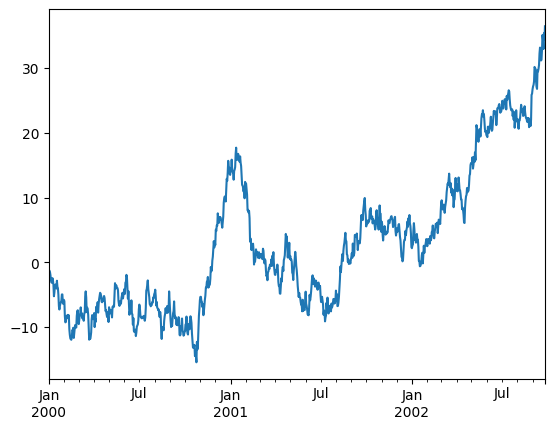

In [72]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts.cumsum().plot()

<Figure size 640x480 with 0 Axes>

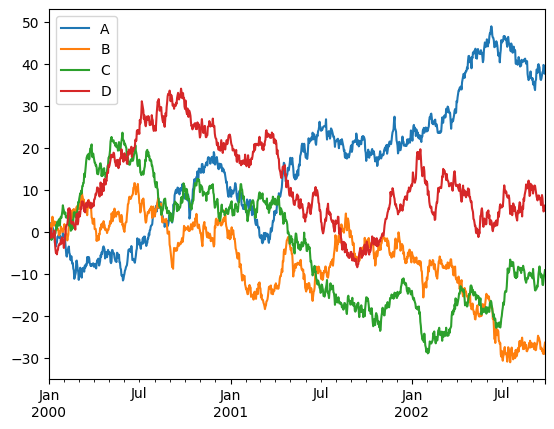

In [73]:
import matplotlib.pyplot as plt

pdf=pd.DataFrame(np.random.randn(1000, 4), index=ts.index,columns=['A', 'B', 'C', 'D'])
pdf = pdf.cumsum()
plt.figure(); pdf.plot(); plt.legend(loc='best')